In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


### Pandas – Loading and Cleaning Data
Today, we'll learn to use **Pandas**, the most essential tool in a Python data scientist's toolkit, to take a raw,
messy dataset and turn it into a clean, reliable foundation for analysis.


1.  The Building Blocks:** What are Pandas `Series` and `DataFrames`?
2.  Getting the Data:** Reading CSV files and first-look inspection.
3.  The Cleaning Workflow:**
    *   Handling Missing Values (`NaN`)
    *   Finding and Removing Duplicates
    *   Correcting Data Types and Formatting
4.  Exporting Our Clean Data.**

__1) The building blocks:series and dataframe__

The two core data structures in Pandas.

*   **`Series`**: A one-dimensional labeled array, like a single column in a spreadsheet.
*   **`DataFrame`**: A two-dimensional labeled data structure with columns of potentially different types, like a full spreadsheet or an SQL table.

Let's quickly create them to see how they work. First, we need to import pandas. The standard convention is to import it as `pd`.


## Create a Series Object from a List
- A pandas **Series** is a one-dimensional labelled array.
- A Series combines the best features of a list and a dictionary.
- A Series maintains a single collection of ordered values (i.e. a single column of data).
- We can assign each value an identifier, which does not have to *be* unique.

In [2]:
import pandas as pd
import numpy as np
list1=[2,4,6,8,9,4,9]

In [3]:
pd.Series(list1)

0    2
1    4
2    6
3    8
4    9
5    4
6    9
dtype: int64

In [4]:
dict1={
    "Name":"samir",
    "age":19,
    "gender":"male"

}
pd.Series(dict1)

Name      samir
age          19
gender     male
dtype: object

In [5]:
ice_cream = ["Chocolate","tea","", "Vanilla", "Strawberry", "Rum Raisin"]
pd.Series(ice_cream)

0     Chocolate
1           tea
2              
3       Vanilla
4    Strawberry
5    Rum Raisin
dtype: object

In [6]:
lottery_numbers = [4, 8, 15, 16, 23, 42]
pd.Series(lottery_numbers,index=[ice_cream])

Chocolate      4
tea            8
              15
Vanilla       16
Strawberry    23
Rum Raisin    42
dtype: int64

In [7]:
lottery_numbers = [4, 8, 15, 16, 23, 42]
pd.Series(lottery_numbers,index=["tea","car","bus","apple","uno","egg"])

tea       4
car       8
bus      15
apple    16
uno      23
egg      42
dtype: int64

### Creating a `DataFrame`

A `DataFrame` is the most common object you'll work with. It's a collection of Series. The most common way to create one from scratch is using a dictionary.


In [8]:
data={
    'StudentID': [101, 102, 103, 104],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Score': [85, 92, 78, 88]
}
student_df=pd.DataFrame(data)
print("A dataframe:")
student_df

A dataframe:


,StudentID,Name,Score
0,101,Alice,85
1,102,Bob,92
2,103,Charlie,78
3,104,David,88


In [9]:
data={
    'StudentID': [101, 102, 103, 104],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Score': [85, 92, 78, 88]
}
y=data["StudentID"]
student_df=pd.DataFrame(data,index=y)
student_df=student_df.set_index("StudentID")
print("A dataframe:")
student_df

A dataframe:


,Name,Score
StudentID,,
101,Alice,85
102,Bob,92
103,Charlie,78
104,David,88


## 2. Reading Data & Initial Inspection

Manually creating DataFrames is rare. Most of the time, you'll load data from a file, most commonly a CSV (Comma-Separated Values) file.

We'll use the powerful `pd.read_csv()` function.

### First-Look Inspection: The "Medical Checkup" for Data

Never start cleaning without a proper checkup. These are your essential first commands.

*   `.head()`: View the first 5 rows.
*   `.tail()`: View the last 5 rows.
*   `.shape`: Get the number of rows and columns (rows, columns).
*   `.info()`: **CRUCIAL!** Get a summary of the DataFrame, including data types and non-null counts.
*   `.describe()`: Get a statistical summary of the numerical columns.

In [10]:
messy_data_csv = """OrderID,OrderDate,Product,Price,Quantity,Region
1001,2023-01-05,Laptop,$100,2,North
1002,2023-01-07,Mouse,$25.50,5,South
1003,2023-01-10,Keyboard,,3,North
1004,2023-01-12,Monitor,$300,,"West"
1005,2023-01-15,Webcam,$45.99,1,East
1002,2023-01-07,Mouse,$25.50,5,South
1006,2023-01-18,,$15.00,2,East
1007,2023-01-20,Laptop,$1200.00,1, North
1008,2023-01-22,External HDD,$80,4,USA
"""
with open("sales_datas_messy.csv",'w')as f:
    f.write(messy_data_csv)
read_file=pd.read_csv("sales_datas_messy.csv")
read_file=read_file.set_index("OrderID")
print("DataFrame with OrderID as index:")

print(read_file)

DataFrame with OrderID as index:
          OrderDate       Product     Price  Quantity  Region
OrderID                                                      
1001     2023-01-05        Laptop      $100       2.0   North
1002     2023-01-07         Mouse    $25.50       5.0   South
1003     2023-01-10      Keyboard       NaN       3.0   North
1004     2023-01-12       Monitor      $300       NaN    West
1005     2023-01-15        Webcam    $45.99       1.0    East
1002     2023-01-07         Mouse    $25.50       5.0   South
1006     2023-01-18           NaN    $15.00       2.0    East
1007     2023-01-20        Laptop  $1200.00       1.0   North
1008     2023-01-22  External HDD       $80       4.0     USA


In [11]:
df=pd.DataFrame(read_file)

In [12]:
print(df)

          OrderDate       Product     Price  Quantity  Region
OrderID                                                      
1001     2023-01-05        Laptop      $100       2.0   North
1002     2023-01-07         Mouse    $25.50       5.0   South
1003     2023-01-10      Keyboard       NaN       3.0   North
1004     2023-01-12       Monitor      $300       NaN    West
1005     2023-01-15        Webcam    $45.99       1.0    East
1002     2023-01-07         Mouse    $25.50       5.0   South
1006     2023-01-18           NaN    $15.00       2.0    East
1007     2023-01-20        Laptop  $1200.00       1.0   North
1008     2023-01-22  External HDD       $80       4.0     USA


In [13]:
read_file.isnull()

,OrderDate,Product,Price,Quantity,Region
OrderID,,,,,
1001,False,False,False,False,False
1002,False,False,False,False,False
1003,False,False,True,False,False
1004,False,False,False,True,False
1005,False,False,False,False,False
1002,False,False,False,False,False
1006,False,True,False,False,False
1007,False,False,False,False,False
1008,False,False,False,False,False


In [14]:
read_file.head()

,OrderDate,Product,Price,Quantity,Region
OrderID,,,,,
1001,2023-01-05,Laptop,$100,2.0,North
1002,2023-01-07,Mouse,$25.50,5.0,South
1003,2023-01-10,Keyboard,NaN,3.0,North
1004,2023-01-12,Monitor,$300,NaN,West
1005,2023-01-15,Webcam,$45.99,1.0,East


In [15]:
read_file.tail()

,OrderDate,Product,Price,Quantity,Region
OrderID,,,,,
1005,2023-01-15,Webcam,$45.99,1.0,East
1002,2023-01-07,Mouse,$25.50,5.0,South
1006,2023-01-18,NaN,$15.00,2.0,East
1007,2023-01-20,Laptop,$1200.00,1.0,North
1008,2023-01-22,External HDD,$80,4.0,USA


In [16]:
read_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1001 to 1008
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderDate  9 non-null      object 
 1   Product    8 non-null      object 
 2   Price      8 non-null      object 
 3   Quantity   8 non-null      float64
 4   Region     9 non-null      object 
dtypes: float64(1), object(4)
memory usage: 432.0+ bytes


In [17]:
read_file.describe()

,Quantity
count,8.000000
mean,2.875000
std,1.642081
min,1.000000
25%,1.750000
50%,2.500000
75%,4.250000
max,5.000000


In [18]:
read_file.shape

(9, 5)

In [19]:
new_df=df[["Price","Product"]]
print(new_df)

            Price       Product
OrderID                        
1001         $100        Laptop
1002       $25.50         Mouse
1003          NaN      Keyboard
1004         $300       Monitor
1005       $45.99        Webcam
1002       $25.50         Mouse
1006       $15.00           NaN
1007     $1200.00        Laptop
1008          $80  External HDD


In [20]:
df.columns

Index(['OrderDate', 'Product', 'Price', 'Quantity', 'Region'], dtype='object')

In [21]:
import json
data = [
    {
        "id": 1,
        "name": "Sundar Joshi",
        "age": 22,
        "department": "Social Science",
        "salary": 6000
    },
    {
        "id": 2,
        "name": "Sita Sharma",
        "age": 25,
        "department": "Engineer",
        "salary": 5000
    },
    {
        "id": 3,
        "name": "Ram Karki",
        "age": 30,
        "department": "Front Desk",
        "salary": 5000
    }
]
with open("employee.json","w") as f:
    json.dump(data,f,indent=4)
    
print("employee.json created sucessfully")

employee.json created sucessfully


In [22]:
dffdffv=pd.read_json("employee.json")

## 3. The Data Cleaning Workflow

### Step 1: Handling Missing Values

Missing data is often represented as `NaN` (Not a Number). Our first step is to identify where they are and decide on a strategy.

**Strategy Options:**
1.  **Drop:** Remove rows or columns with missing values. (Use if the data is unusable or if you have a huge dataset and can afford to lose some rows).
2.  **Fill (Impute):** Replace missing values with something meaningful (e.g., 0, the mean, the median, or the most frequent value).

First, let's count the `NaN`s in each column.

In [23]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

#### Cleaning `Product` and `Quantity`

*   The missing `Product` name makes that row less useful for sales analysis.
*   A missing `Quantity` could be assumed to be 0, but a missing price is harder to guess.

Let's start by filling the missing `Quantity` with the **median** value of the column. Using the median is often better than the mean because it's less sensitive to outliers.

And for the missing `Product`, we will fill it with the string 'Unknown'.


In [24]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Fill missing Quantity with the median of the column

median_quantity = df['Quantity'].median()
print(f"The median quantity is: {median_quantity}")


df.fillna({'Quantity': median_quantity}, inplace=True)
#df.fillna({'Product': 'Unknown'}, inplace=True)

df["Product"]=df["Product"].fillna("Unknown")
print(df)

The median quantity is: 2.5
          OrderDate       Product     Price  Quantity  Region
OrderID                                                      
1001     2023-01-05        Laptop      $100       2.0   North
1002     2023-01-07         Mouse    $25.50       5.0   South
1003     2023-01-10      Keyboard       NaN       3.0   North
1004     2023-01-12       Monitor      $300       2.5    West
1005     2023-01-15        Webcam    $45.99       1.0    East
1002     2023-01-07         Mouse    $25.50       5.0   South
1006     2023-01-18       Unknown    $15.00       2.0    East
1007     2023-01-20        Laptop  $1200.00       1.0   North
1008     2023-01-22  External HDD       $80       4.0     USA


In [26]:
print("\nmissing values after..........")
df.isnull().sum()


missing values after..........


OrderDate    0
Product      0
Price        1
Quantity     0
Region       0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1001 to 1008
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderDate  9 non-null      object 
 1   Product    9 non-null      object 
 2   Price      8 non-null      object 
 3   Quantity   9 non-null      float64
 4   Region     9 non-null      object 
dtypes: float64(1), object(4)
memory usage: 432.0+ bytes


In [28]:
df["Price"]=df["Price"].str.replace("$","",regex=False)

In [29]:
print(df)

          OrderDate       Product    Price  Quantity  Region
OrderID                                                     
1001     2023-01-05        Laptop      100       2.0   North
1002     2023-01-07         Mouse    25.50       5.0   South
1003     2023-01-10      Keyboard      NaN       3.0   North
1004     2023-01-12       Monitor      300       2.5    West
1005     2023-01-15        Webcam    45.99       1.0    East
1002     2023-01-07         Mouse    25.50       5.0   South
1006     2023-01-18       Unknown    15.00       2.0    East
1007     2023-01-20        Laptop  1200.00       1.0   North
1008     2023-01-22  External HDD       80       4.0     USA


In [30]:
df["Price"]=df["Price"].astype(float)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1001 to 1008
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderDate  9 non-null      object 
 1   Product    9 non-null      object 
 2   Price      8 non-null      float64
 3   Quantity   9 non-null      float64
 4   Region     9 non-null      object 
dtypes: float64(2), object(3)
memory usage: 432.0+ bytes


In [32]:
mean_price = df['Price'].mean()

print(f"The mean of price is: {mean_price}")

df.fillna({"Price": mean_price},inplace=True)

The mean of price is: 223.99875


In [33]:
print(df)

          OrderDate       Product       Price  Quantity  Region
OrderID                                                        
1001     2023-01-05        Laptop   100.00000       2.0   North
1002     2023-01-07         Mouse    25.50000       5.0   South
1003     2023-01-10      Keyboard   223.99875       3.0   North
1004     2023-01-12       Monitor   300.00000       2.5    West
1005     2023-01-15        Webcam    45.99000       1.0    East
1002     2023-01-07         Mouse    25.50000       5.0   South
1006     2023-01-18       Unknown    15.00000       2.0    East
1007     2023-01-20        Laptop  1200.00000       1.0   North
1008     2023-01-22  External HDD    80.00000       4.0     USA


In [34]:
#drop rows where any column has a missing value
read_file.dropna(inplace=True)
print("\n dataframe aster droping")
print(df.isnull().sum())


 dataframe aster droping
OrderDate    0
Product      0
Price        0
Quantity     0
Region       0
dtype: int64


In [35]:
df.duplicated().sum()

np.int64(1)

In [36]:
#check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

df= df.drop_duplicates()
print(f"\nNow: {df.duplicated().sum()}")
df

Number of duplicate rows: 1

Now: 0


,OrderDate,Product,Price,Quantity,Region
OrderID,,,,,
1001,2023-01-05,Laptop,100.00000,2.0,North
1002,2023-01-07,Mouse,25.50000,5.0,South
1003,2023-01-10,Keyboard,223.99875,3.0,North
1004,2023-01-12,Monitor,300.00000,2.5,West
1005,2023-01-15,Webcam,45.99000,1.0,East
1006,2023-01-18,Unknown,15.00000,2.0,East
1007,2023-01-20,Laptop,1200.00000,1.0,North
1008,2023-01-22,External HDD,80.00000,4.0,USA


### Step 3: Correcting Data Types and Formatting

This is where the real magic happens. Our `Price` column is still an `object` because of the '$' signs and commas. We can't calculate total sales with it!

We'll use string methods (`.str`) to clean it up and then `.astype()` to convert it.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 1001 to 1008
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderDate  8 non-null      object 
 1   Product    8 non-null      object 
 2   Price      8 non-null      float64
 3   Quantity   8 non-null      float64
 4   Region     8 non-null      object 
dtypes: float64(2), object(3)
memory usage: 384.0+ bytes


In [38]:
print(f"datatype of price after cleaning:{df}")

datatype of price after cleaning:          OrderDate       Product       Price  Quantity  Region
OrderID                                                        
1001     2023-01-05        Laptop   100.00000       2.0   North
1002     2023-01-07         Mouse    25.50000       5.0   South
1003     2023-01-10      Keyboard   223.99875       3.0   North
1004     2023-01-12       Monitor   300.00000       2.5    West
1005     2023-01-15        Webcam    45.99000       1.0    East
1006     2023-01-18       Unknown    15.00000       2.0    East
1007     2023-01-20        Laptop  1200.00000       1.0   North
1008     2023-01-22  External HDD    80.00000       4.0     USA


In [39]:
# Let's also fix the leading space in the 'Region' column
df['Region'] = df['Region'].str.strip()
print(df)

          OrderDate       Product       Price  Quantity Region
OrderID                                                       
1001     2023-01-05        Laptop   100.00000       2.0  North
1002     2023-01-07         Mouse    25.50000       5.0  South
1003     2023-01-10      Keyboard   223.99875       3.0  North
1004     2023-01-12       Monitor   300.00000       2.5   West
1005     2023-01-15        Webcam    45.99000       1.0   East
1006     2023-01-18       Unknown    15.00000       2.0   East
1007     2023-01-20        Laptop  1200.00000       1.0  North
1008     2023-01-22  External HDD    80.00000       4.0    USA


In [40]:
df['Total Price'] = df['Price']*df['Quantity']
df

,OrderDate,Product,Price,Quantity,Region,Total Price
OrderID,,,,,,
1001,2023-01-05,Laptop,100.00000,2.0,North,200.00000
1002,2023-01-07,Mouse,25.50000,5.0,South,127.50000
1003,2023-01-10,Keyboard,223.99875,3.0,North,671.99625
1004,2023-01-12,Monitor,300.00000,2.5,West,750.00000
1005,2023-01-15,Webcam,45.99000,1.0,East,45.99000
1006,2023-01-18,Unknown,15.00000,2.0,East,30.00000
1007,2023-01-20,Laptop,1200.00000,1.0,North,1200.00000
1008,2023-01-22,External HDD,80.00000,4.0,USA,320.00000


In [41]:
df['Total Prices'] = df['Price']*df['Quantity']
df

,OrderDate,Product,Price,Quantity,Region,Total Price,Total Prices
OrderID,,,,,,,
1001,2023-01-05,Laptop,100.00000,2.0,North,200.00000,200.00000
1002,2023-01-07,Mouse,25.50000,5.0,South,127.50000,127.50000
1003,2023-01-10,Keyboard,223.99875,3.0,North,671.99625,671.99625
1004,2023-01-12,Monitor,300.00000,2.5,West,750.00000,750.00000
1005,2023-01-15,Webcam,45.99000,1.0,East,45.99000,45.99000
1006,2023-01-18,Unknown,15.00000,2.0,East,30.00000,30.00000
1007,2023-01-20,Laptop,1200.00000,1.0,North,1200.00000,1200.00000
1008,2023-01-22,External HDD,80.00000,4.0,USA,320.00000,320.00000


In [42]:
df=df.drop(columns="Total Prices")

In [43]:
df.to_csv('clean_data.csv',index=False)
df

,OrderDate,Product,Price,Quantity,Region,Total Price
OrderID,,,,,,
1001,2023-01-05,Laptop,100.00000,2.0,North,200.00000
1002,2023-01-07,Mouse,25.50000,5.0,South,127.50000
1003,2023-01-10,Keyboard,223.99875,3.0,North,671.99625
1004,2023-01-12,Monitor,300.00000,2.5,West,750.00000
1005,2023-01-15,Webcam,45.99000,1.0,East,45.99000
1006,2023-01-18,Unknown,15.00000,2.0,East,30.00000
1007,2023-01-20,Laptop,1200.00000,1.0,North,1200.00000
1008,2023-01-22,External HDD,80.00000,4.0,USA,320.00000


In [44]:
df=pd.read_csv('clean_data.csv')
df

,OrderDate,Product,Price,Quantity,Region,Total Price
0,2023-01-05,Laptop,100.00000,2.0,North,200.00000
1,2023-01-07,Mouse,25.50000,5.0,South,127.50000
2,2023-01-10,Keyboard,223.99875,3.0,North,671.99625
3,2023-01-12,Monitor,300.00000,2.5,West,750.00000
4,2023-01-15,Webcam,45.99000,1.0,East,45.99000
5,2023-01-18,Unknown,15.00000,2.0,East,30.00000
6,2023-01-20,Laptop,1200.00000,1.0,North,1200.00000
7,2023-01-22,External HDD,80.00000,4.0,USA,320.00000


In [45]:
#example1

In [46]:
import pandas as pd

students_data_messy = """student_id,name,gender,score,study_hours
1,Alice,F,85,10
2,Bob,M,92,8
3,Charlie,Male,"78%",12
4,Diana,F,,15
5,Ethan,M,65,5
6,Fiona,Female,95,11
7,George,M,-5,4
5,Ethan,M,65,5
8,Hannah,F,88,9
9,Ian,Male,"62%",-2
10,Jane,F,,14
"""
with open("student_performance.csv",'w')as f:
    f.write(students_data_messy)
df=pd.read_csv("student_performance.csv")

In [47]:
df

,student_id,name,gender,score,study_hours
0,1,Alice,F,85,10
1,2,Bob,M,92,8
2,3,Charlie,Male,78%,12
3,4,Diana,F,NaN,15
4,5,Ethan,M,65,5
5,6,Fiona,Female,95,11
6,7,George,M,-5,4
7,5,Ethan,M,65,5
8,8,Hannah,F,88,9
9,9,Ian,Male,62%,-2


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   student_id   11 non-null     int64 
 1   name         11 non-null     object
 2   gender       11 non-null     object
 3   score        9 non-null      object
 4   study_hours  11 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 572.0+ bytes


In [49]:
df.head()

,student_id,name,gender,score,study_hours
0,1,Alice,F,85,10
1,2,Bob,M,92,8
2,3,Charlie,Male,78%,12
3,4,Diana,F,NaN,15
4,5,Ethan,M,65,5


In [50]:
df.isnull()

,student_id,name,gender,score,study_hours
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [51]:
df.isnull().sum()

student_id     0
name           0
gender         0
score          2
study_hours    0
dtype: int64

In [52]:
df=df.set_index("student_id")
print("DataFrame with studentid as index:")

DataFrame with studentid as index:


In [53]:
df

,name,gender,score,study_hours
student_id,,,,
1,Alice,F,85,10
2,Bob,M,92,8
3,Charlie,Male,78%,12
4,Diana,F,NaN,15
5,Ethan,M,65,5
6,Fiona,Female,95,11
7,George,M,-5,4
5,Ethan,M,65,5
8,Hannah,F,88,9


In [54]:
df.columns

Index(['name', 'gender', 'score', 'study_hours'], dtype='object')

In [55]:
df['gender'] = df['gender'].replace({
    'Male': 'M',
    'Female': 'F'
})

In [56]:
df

,name,gender,score,study_hours
student_id,,,,
1,Alice,F,85,10
2,Bob,M,92,8
3,Charlie,M,78%,12
4,Diana,F,NaN,15
5,Ethan,M,65,5
6,Fiona,F,95,11
7,George,M,-5,4
5,Ethan,M,65,5
8,Hannah,F,88,9


In [57]:
df["gender"].nunique()

2

In [58]:
df["gender"].value_counts()

gender
M    6
F    5
Name: count, dtype: int64

In [59]:
df['score']=df['score'].str.replace("%","",regex=False)
df['score']=df['score'].astype(float)
df

,name,gender,score,study_hours
student_id,,,,
1,Alice,F,85.0,10
2,Bob,M,92.0,8
3,Charlie,M,78.0,12
4,Diana,F,NaN,15
5,Ethan,M,65.0,5
6,Fiona,F,95.0,11
7,George,M,-5.0,4
5,Ethan,M,65.0,5
8,Hannah,F,88.0,9


In [60]:
df['score']=df['score'].abs()

In [61]:
df

,name,gender,score,study_hours
student_id,,,,
1,Alice,F,85.0,10
2,Bob,M,92.0,8
3,Charlie,M,78.0,12
4,Diana,F,NaN,15
5,Ethan,M,65.0,5
6,Fiona,F,95.0,11
7,George,M,5.0,4
5,Ethan,M,65.0,5
8,Hannah,F,88.0,9


In [62]:
df = df.drop_duplicates()

In [63]:
df

,name,gender,score,study_hours
student_id,,,,
1,Alice,F,85.0,10
2,Bob,M,92.0,8
3,Charlie,M,78.0,12
4,Diana,F,NaN,15
5,Ethan,M,65.0,5
6,Fiona,F,95.0,11
7,George,M,5.0,4
8,Hannah,F,88.0,9
9,Ian,M,62.0,-2


In [64]:
df['score']=df['score'].fillna("65.0")

C:\Users\dell\AppData\Local\Temp\ipykernel_17260\543211472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score']=df['score'].fillna("65.0")


In [65]:
df

,name,gender,score,study_hours
student_id,,,,
1,Alice,F,85.0,10
2,Bob,M,92.0,8
3,Charlie,M,78.0,12
4,Diana,F,65.0,15
5,Ethan,M,65.0,5
6,Fiona,F,95.0,11
7,George,M,5.0,4
8,Hannah,F,88.0,9
9,Ian,M,62.0,-2


In [66]:
df['study_hours']=df['study_hours'].abs()
df

C:\Users\dell\AppData\Local\Temp\ipykernel_17260\1451730645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['study_hours']=df['study_hours'].abs()


,name,gender,score,study_hours
student_id,,,,
1,Alice,F,85.0,10
2,Bob,M,92.0,8
3,Charlie,M,78.0,12
4,Diana,F,65.0,15
5,Ethan,M,65.0,5
6,Fiona,F,95.0,11
7,George,M,5.0,4
8,Hannah,F,88.0,9
9,Ian,M,62.0,2


In [67]:
df.to_csv("student_performance.csv",index=False)
df

,name,gender,score,study_hours
student_id,,,,
1,Alice,F,85.0,10
2,Bob,M,92.0,8
3,Charlie,M,78.0,12
4,Diana,F,65.0,15
5,Ethan,M,65.0,5
6,Fiona,F,95.0,11
7,George,M,5.0,4
8,Hannah,F,88.0,9
9,Ian,M,62.0,2


In [68]:
corr_df=df[['score','study_hours']]

In [69]:
corr_df.corr()

,score,study_hours
score,1.000000,0.410894
study_hours,0.410894,1.000000


<Axes: xlabel='student_id'>

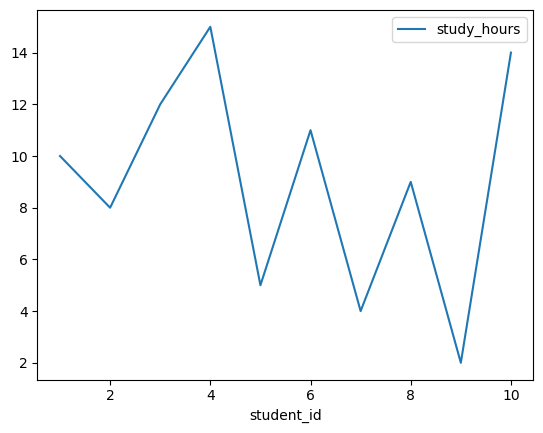

In [70]:
df.plot()

In [71]:
import pandas as pd
dff = pd.read_csv('ecommerce_sales_data.csv')
dff

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,766.85,4,3067.40,81af1248-afff-46ee-a091-81cf33d0d957,39,Male,25/05/2024,6:28:14
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,331.42,4,1325.68,f3f3f4ac-7ad0-4362-9134-383096d16ac8,21,Male,04/05/2024,19:37:36
2,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,708.10,10,7081.00,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,27,Female,07/05/2024,17:54:42
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,774.09,2,1548.18,578e2d1a-d92a-449d-8eeb-b704110b2975,51,Female,23/05/2024,22:31:43
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,397.22,1,397.22,dc6ed196-0874-46bd-bbb9-c5534f619349,45,Female,15/03/2024,3:08:25
...,...,...,...,...,...,...,...,...,...,...,...
99995,67e1224d-86a1-411c-a880-69c3786a15e9,lot,Toys,777.82,2,1555.64,a38aebb9-d3b4-468b-a999-e6d26d62635f,32,Male,01/05/2024,4:49:40
99996,9ad2bf4d-9453-472a-ae50-9d6d2cf8e5e4,animal,Clothing,473.23,1,473.23,4fa8f362-4897-4633-995d-ec5acffbb4d7,48,Female,21/05/2024,9:13:18
99997,43c58940-e1ab-4e8a-8cea-f02811904c06,simply,Electronics,591.40,8,4731.20,190b3b11-217d-43ed-b6d2-aa55be036c85,41,Male,25/03/2024,13:34:07
99998,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,490.93,1,490.93,60e350b2-601a-401c-a8f7-f45e827a6594,56,Female,01/06/2024,3:09:28


In [72]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Order ID         100000 non-null  object 
 1   Product Name     100000 non-null  object 
 2   Category         100000 non-null  object 
 3   Price            100000 non-null  float64
 4   Quantity         100000 non-null  int64  
 5   Total Sales      100000 non-null  float64
 6   Customer ID      100000 non-null  object 
 7   Customer Age     100000 non-null  int64  
 8   Customer Gender  100000 non-null  object 
 9   Purchase Date    100000 non-null  object 
 10  Purchase Time    100000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.4+ MB


In [73]:
dff.isnull().sum()

Order ID           0
Product Name       0
Category           0
Price              0
Quantity           0
Total Sales        0
Customer ID        0
Customer Age       0
Customer Gender    0
Purchase Date      0
Purchase Time      0
dtype: int64

In [74]:
dff.tail()

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
99995,67e1224d-86a1-411c-a880-69c3786a15e9,lot,Toys,777.82,2,1555.64,a38aebb9-d3b4-468b-a999-e6d26d62635f,32,Male,01/05/2024,4:49:40
99996,9ad2bf4d-9453-472a-ae50-9d6d2cf8e5e4,animal,Clothing,473.23,1,473.23,4fa8f362-4897-4633-995d-ec5acffbb4d7,48,Female,21/05/2024,9:13:18
99997,43c58940-e1ab-4e8a-8cea-f02811904c06,simply,Electronics,591.40,8,4731.20,190b3b11-217d-43ed-b6d2-aa55be036c85,41,Male,25/03/2024,13:34:07
99998,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,490.93,1,490.93,60e350b2-601a-401c-a8f7-f45e827a6594,56,Female,01/06/2024,3:09:28
99999,192e6ac4-2d97-4055-bec9-d0175f768ec3,nothing,Home & Garden,938.06,8,7504.48,a060dacf-962a-464c-a5c5-a5de55014e3b,46,Male,30/05/2024,20:12:20


In [75]:
dir()

['In',
 'Out',
 '_',
 '_10',
 '_13',
 '_14',
 '_15',
 '_17',
 '_18',
 '_2',
 '_20',
 '_23',
 '_24',
 '_26',
 '_3',
 '_35',
 '_36',
 '_37',
 '_4',
 '_40',
 '_41',
 '_43',
 '_44',
 '_47',
 '_49',
 '_5',
 '_50',
 '_51',
 '_53',
 '_54',
 '_56',
 '_57',
 '_58',
 '_59',
 '_6',
 '_61',
 '_63',
 '_65',
 '_66',
 '_67',
 '_69',
 '_7',
 '_70',
 '_71',
 '_73',
 '_74',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__pandas',
 '__session__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55

In [76]:
dff.head()

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,766.85,4,3067.40,81af1248-afff-46ee-a091-81cf33d0d957,39,Male,25/05/2024,6:28:14
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,331.42,4,1325.68,f3f3f4ac-7ad0-4362-9134-383096d16ac8,21,Male,04/05/2024,19:37:36
2,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,708.10,10,7081.00,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,27,Female,07/05/2024,17:54:42
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,774.09,2,1548.18,578e2d1a-d92a-449d-8eeb-b704110b2975,51,Female,23/05/2024,22:31:43
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,397.22,1,397.22,dc6ed196-0874-46bd-bbb9-c5534f619349,45,Female,15/03/2024,3:08:25


In [77]:
dff['Customer Gender'] = dff['Customer Gender'].replace({
    'Male': 'M',
    'Female': 'F'
})
dff

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,766.85,4,3067.40,81af1248-afff-46ee-a091-81cf33d0d957,39,M,25/05/2024,6:28:14
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,331.42,4,1325.68,f3f3f4ac-7ad0-4362-9134-383096d16ac8,21,M,04/05/2024,19:37:36
2,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,708.10,10,7081.00,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,27,F,07/05/2024,17:54:42
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,774.09,2,1548.18,578e2d1a-d92a-449d-8eeb-b704110b2975,51,F,23/05/2024,22:31:43
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,397.22,1,397.22,dc6ed196-0874-46bd-bbb9-c5534f619349,45,F,15/03/2024,3:08:25
...,...,...,...,...,...,...,...,...,...,...,...
99995,67e1224d-86a1-411c-a880-69c3786a15e9,lot,Toys,777.82,2,1555.64,a38aebb9-d3b4-468b-a999-e6d26d62635f,32,M,01/05/2024,4:49:40
99996,9ad2bf4d-9453-472a-ae50-9d6d2cf8e5e4,animal,Clothing,473.23,1,473.23,4fa8f362-4897-4633-995d-ec5acffbb4d7,48,F,21/05/2024,9:13:18
99997,43c58940-e1ab-4e8a-8cea-f02811904c06,simply,Electronics,591.40,8,4731.20,190b3b11-217d-43ed-b6d2-aa55be036c85,41,M,25/03/2024,13:34:07
99998,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,490.93,1,490.93,60e350b2-601a-401c-a8f7-f45e827a6594,56,F,01/06/2024,3:09:28


In [78]:
#left to complete

In [79]:
# dff.iloc[0]: Select the first row by position

print(dff.iloc[0])

Order ID           261e3740-c0e9-42b1-bf87-881ac950fa3a
Product Name                                   audience
Category                                  Home & Garden
Price                                            766.85
Quantity                                              4
Total Sales                                      3067.4
Customer ID        81af1248-afff-46ee-a091-81cf33d0d957
Customer Age                                         39
Customer Gender                                       M
Purchase Date                                25/05/2024
Purchase Time                                   6:28:14
Name: 0, dtype: object


In [80]:
print(dff.iloc[0:10])

                               Order ID Product Name       Category   Price  \
0  261e3740-c0e9-42b1-bf87-881ac950fa3a     audience  Home & Garden  766.85   
1  0b332b34-46dc-4eaf-a808-fec7e97ffbc6         such       Clothing  331.42   
2  432e0b36-724d-4521-85ae-f66db8af8105         read       Clothing  708.10   
3  ca20fb08-5c65-43b8-9577-3fa49913f93b        skill    Electronics  774.09   
4  1dce189c-8c60-455f-a6f2-69bb2cb71539         cold    Electronics  397.22   
5  ebb310bc-aeba-4c74-a6ad-38823e86d950          hit  Home & Garden  857.68   
6  96f73850-6cee-4045-81a8-c86ebe2199f9         base          Books  816.40   
7  08ba4d6f-56ee-4997-9c54-e61ab0338db0       inside       Clothing  328.49   
8  dd18a780-8331-4337-8f4a-80f37cd75adc         film       Clothing  661.57   
9  16de07e0-1064-4f20-9696-78289d898571         ever           Toys  902.55   

   Quantity  Total Sales                           Customer ID  Customer Age  \
0         4      3067.40  81af1248-afff-46ee-a091-

In [81]:
print(dff.iloc[0:10,1])

0    audience
1        such
2        read
3       skill
4        cold
5         hit
6        base
7      inside
8        film
9        ever
Name: Product Name, dtype: object


In [82]:
dff.shape

(100000, 11)

In [83]:
price_15 = dff.loc[15,['Price']]
print(price_15)

Price    435.59
Name: 15, dtype: object


In [84]:
mask=dff['Price']>100
dff[mask]

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,766.85,4,3067.40,81af1248-afff-46ee-a091-81cf33d0d957,39,M,25/05/2024,6:28:14
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,331.42,4,1325.68,f3f3f4ac-7ad0-4362-9134-383096d16ac8,21,M,04/05/2024,19:37:36
2,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,708.10,10,7081.00,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,27,F,07/05/2024,17:54:42
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,774.09,2,1548.18,578e2d1a-d92a-449d-8eeb-b704110b2975,51,F,23/05/2024,22:31:43
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,397.22,1,397.22,dc6ed196-0874-46bd-bbb9-c5534f619349,45,F,15/03/2024,3:08:25
...,...,...,...,...,...,...,...,...,...,...,...
99995,67e1224d-86a1-411c-a880-69c3786a15e9,lot,Toys,777.82,2,1555.64,a38aebb9-d3b4-468b-a999-e6d26d62635f,32,M,01/05/2024,4:49:40
99996,9ad2bf4d-9453-472a-ae50-9d6d2cf8e5e4,animal,Clothing,473.23,1,473.23,4fa8f362-4897-4633-995d-ec5acffbb4d7,48,F,21/05/2024,9:13:18
99997,43c58940-e1ab-4e8a-8cea-f02811904c06,simply,Electronics,591.40,8,4731.20,190b3b11-217d-43ed-b6d2-aa55be036c85,41,M,25/03/2024,13:34:07
99998,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,490.93,1,490.93,60e350b2-601a-401c-a8f7-f45e827a6594,56,F,01/06/2024,3:09:28


In [85]:
# df.loc[...]: Select specific columns
subset = dff.loc[0:5, ['Order ID', 'Category', 'Price', 'Customer Gender']]


In [86]:
dff

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,766.85,4,3067.40,81af1248-afff-46ee-a091-81cf33d0d957,39,M,25/05/2024,6:28:14
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,331.42,4,1325.68,f3f3f4ac-7ad0-4362-9134-383096d16ac8,21,M,04/05/2024,19:37:36
2,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,708.10,10,7081.00,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,27,F,07/05/2024,17:54:42
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,774.09,2,1548.18,578e2d1a-d92a-449d-8eeb-b704110b2975,51,F,23/05/2024,22:31:43
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,397.22,1,397.22,dc6ed196-0874-46bd-bbb9-c5534f619349,45,F,15/03/2024,3:08:25
...,...,...,...,...,...,...,...,...,...,...,...
99995,67e1224d-86a1-411c-a880-69c3786a15e9,lot,Toys,777.82,2,1555.64,a38aebb9-d3b4-468b-a999-e6d26d62635f,32,M,01/05/2024,4:49:40
99996,9ad2bf4d-9453-472a-ae50-9d6d2cf8e5e4,animal,Clothing,473.23,1,473.23,4fa8f362-4897-4633-995d-ec5acffbb4d7,48,F,21/05/2024,9:13:18
99997,43c58940-e1ab-4e8a-8cea-f02811904c06,simply,Electronics,591.40,8,4731.20,190b3b11-217d-43ed-b6d2-aa55be036c85,41,M,25/03/2024,13:34:07
99998,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,490.93,1,490.93,60e350b2-601a-401c-a8f7-f45e827a6594,56,F,01/06/2024,3:09:28


## 2. Transformation (Sorting & Filtering)
**Concepts:** `sort_values`, `query`, boolean masking.

In [87]:
# Task: Find the Top 5 costliest orders in 'Western Dress' product
# Syntax: df.sort_values(['col1', 'col2'], ascending=[True, False])

In [88]:
sorted_dff = dff.sort_values(by=['Purchase Date', 'Total Sales'], ascending=[False, False])

In [89]:
display(sorted_dff[['Purchase Date','Total Sales','Product Name']].head())

,Purchase Date,Total Sales,Product Name
35209,31/05/2024,9929.7,same
23311,31/05/2024,9902.5,dark
57927,31/05/2024,9877.3,up
58766,31/05/2024,9524.0,half
79331,31/05/2024,9338.4,PM


In [90]:
max_price = dff['Price'].max()
print(max_price)



999.99


In [91]:
# Task: Filter orders where Price > 990 AND Category is 'Electronics'

# Method 1: Boolean Masking
mask = (dff['Price'] > 990) & (dff['Category'] == 'Electronics')
print(f"High Value of Electronics Orders (Mask): {len(dff[mask])}")
dff[mask]


High Value of Electronics Orders (Mask): 222


,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
333,5d474461-c5bc-4594-9f0d-6b51f9243707,yes,Electronics,994.65,6,5967.90,89754610-6f93-473c-bb02-264cdbfb08a5,38,F,27/04/2024,2:23:27
913,fa533e7e-be71-46af-95c9-e0cacd6d3149,program,Electronics,997.38,1,997.38,4fce7b22-e13d-44cc-bff9-7205f33fb891,70,M,25/05/2024,16:43:21
1826,ffa97bf4-4b10-44fd-b7cb-99829f714a98,magazine,Electronics,990.84,6,5945.04,8fd6bf5d-54fa-4c07-8c17-870b2c6a6ece,46,M,09/04/2024,9:52:20
2514,a7e6763b-00ff-4f09-82b3-e3ee7ae40322,interview,Electronics,993.28,5,4966.40,4733fab2-961b-4cf4-898e-f8cc8087c5ad,52,F,02/05/2024,20:48:49
2708,c88eb8e4-bb0c-4788-9462-fe159b8bdaeb,land,Electronics,991.01,8,7928.08,851229f3-97ad-4391-a0c5-5c58a3cba0d8,69,F,27/04/2024,8:18:12
...,...,...,...,...,...,...,...,...,...,...,...
98876,64c1fe9b-631a-447e-a989-e9df3c3fb05d,whom,Electronics,997.25,4,3989.00,e9eb0c98-fbb7-4e65-846b-32ae53381fea,22,F,27/02/2024,16:52:27
99177,0ead484f-bae7-4e3a-9025-a6f308c8fe8a,statement,Electronics,994.15,4,3976.60,a93446f1-6896-4226-a5c9-d606c4a76401,60,M,13/04/2024,6:34:45
99839,14223457-5447-4d97-a90c-162f77c1931a,local,Electronics,991.99,10,9919.90,e40c0e24-d6b8-48a0-a899-fa3700d0c48b,27,M,24/03/2024,7:29:57
99897,6274d8fd-5181-4bdc-b06b-d878650fe596,officer,Electronics,992.34,6,5954.04,034d09c3-875c-4d7b-9052-c85a21ea31e6,54,F,07/05/2024,7:14:57


In [92]:
mask = (dff['Customer Gender'] == 'F') & (dff['Total Sales'] > 2000)
print(f"Count (Mask): {len(dff[mask])}")

Count (Mask): 28353


In [93]:
# Method 2: Query Syntax (Cleaner)
# Syntax: df.query('col > value')

filtered_query = dff.query("Price > 990 and Category == 'Books'")
print(f"High Value Electronics Orders (Query): {len(filtered_query)}")

display(filtered_query[['Order ID', 'Price']].head(3))


High Value Electronics Orders (Query): 234


,Order ID,Price
123,862f0dab-f076-4297-9533-de35ec1779f8,991.87
365,4448aa26-cc01-4c2a-9944-58af41c31f19,990.06
565,89a41c53-a5ad-4a40-ab73-601ce5c81d23,993.59


In [94]:
query_dff = dff.query("`Customer Gender` == 'F' and `Customer Age` < 20")
print(f"Count (Query): {len(query_dff)}")

display(query_dff.head(3))

Count (Query): 1905


,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
44,feab344a-9ea5-4de8-b815-25447455ac05,individual,Electronics,407.42,5,2037.10,91574b39-bf3b-40b0-8ba5-92fda828953d,19,F,22/05/2024,22:26:24
138,12bddc6d-e0b3-4b23-9c17-690569b59124,professor,Books,773.78,1,773.78,5b8011d5-5af0-4748-9e32-e53c20cc09af,18,F,12/03/2024,22:49:06
171,088eff69-217b-44e0-a8b9-3b4a7b5dc0f0,young,Toys,414.53,4,1658.12,1c595846-1cc6-4b89-8b22-98bcad5531b7,18,F,03/04/2024,14:45:25


## 3. Application Functions (`.apply`)
**Concepts:** `apply`, `lambda`.

**Task:** Create a column `Order_Size`.
*   If Qty == 1 -> 'Single'
*   If Qty > 1 -> 'Bulk'

In [95]:
def classify_age(age):
    if age < 30:
        return 'Young Adult'
    elif age <= 50:
        return 'Adult'
    else:
        return 'Senior'

# Apply to 'Customer Age' column
dff['Age Group'] = dff['Customer Age'].apply(classify_age)
dff['Price group plus vat'] = dff['Price'].apply(lambda x: x * 1.13)


# Verify
print(dff['Age Group'].value_counts())
display(dff[['Customer Age', 'Age Group']].head())
display(dff[['Price','Price group plus vat']].head())

Age Group
Adult          39628
Senior         37709
Young Adult    22663
Name: count, dtype: int64


,Customer Age,Age Group
0,39,Adult
1,21,Young Adult
2,27,Young Adult
3,51,Senior
4,45,Adult


,Price,Price group plus vat
0,766.85,866.5405
1,331.42,374.5046
2,708.10,800.1530
3,774.09,874.7217
4,397.22,448.8586


## 4. Grouping & Aggregation
### A. Basic Grouping
**Question:** Which `Category` generates the highest Total Sales?

In [96]:
# Group by Category, Sum the Total Sales
cat_performance = dff.groupby('Category')['Total Sales'].sum().reset_index()
display(cat_performance)

,Category,Total Sales
0,Books,60820086.17
1,Clothing,61071489.36
2,Electronics,59955937.12
3,Home & Garden,60670371.57
4,Toys,60274785.96


In [97]:
# Group by age group, Sum the Total Sales
age_group = dff.groupby('Age Group')['Total Sales'].sum().reset_index()
display(age_group)

,Age Group,Total Sales
0,Adult,1.200201e+08
1,Senior,1.147351e+08
2,Young Adult,6.803744e+07


In [98]:
# Sort for better view
cat_performance = cat_performance.sort_values('Total Sales', ascending=False)

# Format as currency string for readability
pd.options.display.float_format = '${:,.2f}'.format

display(cat_performance)


,Category,Total Sales
1,Clothing,"$61,071,489.36"
0,Books,"$60,820,086.17"
3,Home & Garden,"$60,670,371.57"
4,Toys,"$60,274,785.96"
2,Electronics,"$59,955,937.12"


In [99]:
age_category=dff.groupby('Customer Age')[['Total Sales','Price','Quantity']].sum().reset_index()
display(age_category)

,Customer Age,Total Sales,Price,Quantity
0,18,"$5,776,028.88","$1,038,873.10",10398
1,19,"$5,365,066.38","$997,501.41",9867
2,20,"$5,675,119.55","$1,015,872.67",10376
3,21,"$5,919,744.73","$1,085,421.11",10796
4,22,"$5,955,318.95","$1,076,383.96",10935
5,23,"$5,650,997.32","$1,042,823.12",10402
6,24,"$5,802,135.90","$1,054,932.60",10269
7,25,"$5,431,379.04","$999,927.72",10024
8,26,"$5,387,339.79","$974,246.53",9849
9,27,"$5,864,952.46","$1,075,411.32",10596


In [100]:
age_category.describe()

,Customer Age,Total Sales,Price,Quantity
count,$53.00,$53.00,$53.00,$53.00
mean,$44.00,"$5,713,069.25","$1,038,774.27","$10,364.45"
std,$15.44,"$157,055.73","$26,537.66",$261.78
min,$18.00,"$5,356,709.12","$967,219.94","$9,663.00"
25%,$31.00,"$5,612,145.90","$1,023,938.57","$10,203.00"
50%,$44.00,"$5,726,011.68","$1,041,164.24","$10,357.00"
75%,$57.00,"$5,833,308.06","$1,054,932.60","$10,561.00"
max,$70.00,"$6,033,692.06","$1,085,421.11","$10,941.00"


### B. Advanced Aggregation
**Task:** Analyze `Total Sales` by `Age Group`.

We want: Min, Max, Average, and Count of sales.

In [101]:
age_stats = dff.groupby('Age Group').agg({
    'Total Sales': ['min', 'max', 'mean', 'count']
})

display(age_stats)

Total Sales                           
                    min       max      mean  count
Age Group                                         
Adult           $100.05 $9,999.40 $3,028.67  39628
Senior          $100.07 $9,998.70 $3,042.64  37709
Young Adult     $100.14 $9,996.20 $3,002.14  22663

In [102]:
dff


,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time,Age Group,Price group plus vat
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,$766.85,4,"$3,067.40",81af1248-afff-46ee-a091-81cf33d0d957,39,M,25/05/2024,6:28:14,Adult,$866.54
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,$331.42,4,"$1,325.68",f3f3f4ac-7ad0-4362-9134-383096d16ac8,21,M,04/05/2024,19:37:36,Young Adult,$374.50
2,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,$708.10,10,"$7,081.00",c4fc4269-3c1d-4b6b-ad23-d437c328d63f,27,F,07/05/2024,17:54:42,Young Adult,$800.15
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,$774.09,2,"$1,548.18",578e2d1a-d92a-449d-8eeb-b704110b2975,51,F,23/05/2024,22:31:43,Senior,$874.72
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,$397.22,1,$397.22,dc6ed196-0874-46bd-bbb9-c5534f619349,45,F,15/03/2024,3:08:25,Adult,$448.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,67e1224d-86a1-411c-a880-69c3786a15e9,lot,Toys,$777.82,2,"$1,555.64",a38aebb9-d3b4-468b-a999-e6d26d62635f,32,M,01/05/2024,4:49:40,Adult,$878.94
99996,9ad2bf4d-9453-472a-ae50-9d6d2cf8e5e4,animal,Clothing,$473.23,1,$473.23,4fa8f362-4897-4633-995d-ec5acffbb4d7,48,F,21/05/2024,9:13:18,Adult,$534.75
99997,43c58940-e1ab-4e8a-8cea-f02811904c06,simply,Electronics,$591.40,8,"$4,731.20",190b3b11-217d-43ed-b6d2-aa55be036c85,41,M,25/03/2024,13:34:07,Adult,$668.28
99998,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,$490.93,1,$490.93,60e350b2-601a-401c-a8f7-f45e827a6594,56,F,01/06/2024,3:09:28,Senior,$554.75


## 3. Merging & Concatenation
### A. Creating Secondary Data (Customer Membership)
Since the main data only has `Customer ID`, we need a separate table to simulate a database join.

In [103]:
import numpy as np

In [104]:
# Get unique customers from main df
unique_customers = dff['Customer ID'].unique()

# Assign them random membership levels
membership_data = {
    'Customer ID': unique_customers,
    'Membership Level': np.random.choice(['Bronze', 'Silver', 'Gold'], size=len(unique_customers)),
    'Discount_Eligible': np.random.choice([True, False], size=len(unique_customers))
}

members_dff = pd.DataFrame(membership_data)


In [105]:
print("--- Membership Table ---")
display(members_dff.head())

--- Membership Table ---


,Customer ID,Membership Level,Discount_Eligible
0,81af1248-afff-46ee-a091-81cf33d0d957,Silver,False
1,f3f3f4ac-7ad0-4362-9134-383096d16ac8,Silver,True
2,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,Bronze,True
3,578e2d1a-d92a-449d-8eeb-b704110b2975,Silver,False
4,dc6ed196-0874-46bd-bbb9-c5534f619349,Silver,True


In [106]:
full_data = pd.merge(
    left=dff,
    right=members_dff,
    on='Customer ID',
    how='left'
)

# Display result
cols_to_show = ['Order ID', 'Total Sales', 'Customer ID', 'Membership Level']
display(full_data[cols_to_show].sample(5))

,Order ID,Total Sales,Customer ID,Membership Level
25825,cfa6025f-e5e6-4b76-8d91-26843f2fb597,"$8,007.80",58b0a8d2-dd35-48b9-9366-2af0e3cda0a5,Gold
64564,f56f2e6b-f79f-431e-b9fa-81345031d8fc,"$2,330.44",00059c43-6da9-4d68-837e-08adf003a2e4,Gold
25975,8b747b2e-2914-46c2-84b8-377fba434f5a,$669.06,d83396b0-bb5c-49c0-b17d-b5114e3f06e1,Silver
17839,93dcbcef-bc7e-4f3a-b890-bd1d7d8c4e4b,"$4,209.10",eb1087d8-0a9a-4c9e-838f-d669d6dc64f7,Gold
25686,ce129096-694d-4aa7-8c49-e2d5a9cd2427,"$1,639.36",0f92c085-e0be-457f-af6c-280df9a058db,Silver


In [107]:
#this addes at right side as show after checking
full_dataright = pd.merge(
    right=dff,
    left=members_dff,
    on='Customer ID',
    how='right'
)

# Display result
cols_to_show = ['Order ID', 'Total Sales', 'Customer ID', 'Membership Level']
display(full_dataright[cols_to_show].sample(5))

,Order ID,Total Sales,Customer ID,Membership Level
9167,29a4a269-fa37-41f5-81ad-5aaf1ea80c5f,"$4,792.41",06e4c0e3-b668-422f-a90c-67dd8864b551,Silver
58675,0d79e2dd-0911-45d4-b84c-ebd519c36caa,"$1,908.08",9e79ed09-eed0-44ce-81a3-d27e2d16dcc7,Bronze
11149,a225fa9f-53cf-470b-a8c9-97975caeb1dc,"$1,951.04",27e97ae7-716c-4fe0-941d-8fea4b8d74ee,Gold
15079,521cabe1-6af2-4b9b-a103-36c9f0612185,"$1,286.01",150afed9-6e44-4109-a1cf-9d731db3398f,Silver
7850,5a22b728-2608-42fb-bc42-92be091a7104,"$3,174.72",2f5935f0-ecd9-4553-8578-84ab78644655,Gold


In [108]:
full_dataright

,Customer ID,Membership Level,Discount_Eligible,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer Age,Customer Gender,Purchase Date,Purchase Time,Age Group,Price group plus vat
0,81af1248-afff-46ee-a091-81cf33d0d957,Silver,False,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,$766.85,4,"$3,067.40",39,M,25/05/2024,6:28:14,Adult,$866.54
1,f3f3f4ac-7ad0-4362-9134-383096d16ac8,Silver,True,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,$331.42,4,"$1,325.68",21,M,04/05/2024,19:37:36,Young Adult,$374.50
2,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,Bronze,True,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,$708.10,10,"$7,081.00",27,F,07/05/2024,17:54:42,Young Adult,$800.15
3,578e2d1a-d92a-449d-8eeb-b704110b2975,Silver,False,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,$774.09,2,"$1,548.18",51,F,23/05/2024,22:31:43,Senior,$874.72
4,dc6ed196-0874-46bd-bbb9-c5534f619349,Silver,True,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,$397.22,1,$397.22,45,F,15/03/2024,3:08:25,Adult,$448.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,a38aebb9-d3b4-468b-a999-e6d26d62635f,Silver,False,67e1224d-86a1-411c-a880-69c3786a15e9,lot,Toys,$777.82,2,"$1,555.64",32,M,01/05/2024,4:49:40,Adult,$878.94
99996,4fa8f362-4897-4633-995d-ec5acffbb4d7,Gold,True,9ad2bf4d-9453-472a-ae50-9d6d2cf8e5e4,animal,Clothing,$473.23,1,$473.23,48,F,21/05/2024,9:13:18,Adult,$534.75
99997,190b3b11-217d-43ed-b6d2-aa55be036c85,Bronze,True,43c58940-e1ab-4e8a-8cea-f02811904c06,simply,Electronics,$591.40,8,"$4,731.20",41,M,25/03/2024,13:34:07,Adult,$668.28
99998,60e350b2-601a-401c-a8f7-f45e827a6594,Bronze,True,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,$490.93,1,$490.93,56,F,01/06/2024,3:09:28,Senior,$554.75


### C. Concatenation
**Task:** Add a small batch of new orders to the dataset.

In [117]:
# Create dummy new orders
new_orders_dict = {
    'Order ID': [5001, 5002],
    'Product Name': ['Smart Watch', 'Tablet'],
    'Category': ['Electronics', 'Electronics'],
    'Total Sales': [250.00, 600.00],
    'Purchase Date': ['2024-05-01', '2024-05-01']
}
new_orders_full_dataright = pd.DataFrame(new_orders_dict)

In [118]:
updated_full_dataright = pd.concat([full_dataright, new_orders_full_dataright], ignore_index=True, sort=False)

In [119]:
display(updated_full_dataright)

,Customer ID,Membership Level,Discount_Eligible,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer Age,Customer Gender,Purchase Date,Purchase Time,Age Group,Price group plus vat
0,81af1248-afff-46ee-a091-81cf33d0d957,Silver,False,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,$766.85,$4.00,"$3,067.40",$39.00,M,25/05/2024,6:28:14,Adult,$866.54
1,f3f3f4ac-7ad0-4362-9134-383096d16ac8,Silver,True,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,$331.42,$4.00,"$1,325.68",$21.00,M,04/05/2024,19:37:36,Young Adult,$374.50
2,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,Bronze,True,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,$708.10,$10.00,"$7,081.00",$27.00,F,07/05/2024,17:54:42,Young Adult,$800.15
3,578e2d1a-d92a-449d-8eeb-b704110b2975,Silver,False,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,$774.09,$2.00,"$1,548.18",$51.00,F,23/05/2024,22:31:43,Senior,$874.72
4,dc6ed196-0874-46bd-bbb9-c5534f619349,Silver,True,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,$397.22,$1.00,$397.22,$45.00,F,15/03/2024,3:08:25,Adult,$448.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,190b3b11-217d-43ed-b6d2-aa55be036c85,Bronze,True,43c58940-e1ab-4e8a-8cea-f02811904c06,simply,Electronics,$591.40,$8.00,"$4,731.20",$41.00,M,25/03/2024,13:34:07,Adult,$668.28
99998,60e350b2-601a-401c-a8f7-f45e827a6594,Bronze,True,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,$490.93,$1.00,$490.93,$56.00,F,01/06/2024,3:09:28,Senior,$554.75
99999,a060dacf-962a-464c-a5c5-a5de55014e3b,Bronze,True,192e6ac4-2d97-4055-bec9-d0175f768ec3,nothing,Home & Garden,$938.06,$8.00,"$7,504.48",$46.00,M,30/05/2024,20:12:20,Adult,"$1,060.01"
100000,NaN,NaN,NaN,5001,Smart Watch,Electronics,NaN,NaN,$250.00,NaN,NaN,2024-05-01,NaN,NaN,NaN


In [120]:

print(f"Original Row Count: {len(full_dataright)}")
print(f"New Row Count: {len(updated_full_dataright)}")
display(updated_full_dataright.tail(3))

Original Row Count: 100000
New Row Count: 100002


,Customer ID,Membership Level,Discount_Eligible,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer Age,Customer Gender,Purchase Date,Purchase Time,Age Group,Price group plus vat
99999,a060dacf-962a-464c-a5c5-a5de55014e3b,Bronze,True,192e6ac4-2d97-4055-bec9-d0175f768ec3,nothing,Home & Garden,$938.06,$8.00,"$7,504.48",$46.00,M,30/05/2024,20:12:20,Adult,"$1,060.01"
100000,NaN,NaN,NaN,5001,Smart Watch,Electronics,NaN,NaN,$250.00,NaN,NaN,2024-05-01,NaN,NaN,NaN
100001,NaN,NaN,NaN,5002,Tablet,Electronics,NaN,NaN,$600.00,NaN,NaN,2024-05-01,NaN,NaN,NaN


In [121]:
updated_full_dataright


,Customer ID,Membership Level,Discount_Eligible,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer Age,Customer Gender,Purchase Date,Purchase Time,Age Group,Price group plus vat
0,81af1248-afff-46ee-a091-81cf33d0d957,Silver,False,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,$766.85,$4.00,"$3,067.40",$39.00,M,25/05/2024,6:28:14,Adult,$866.54
1,f3f3f4ac-7ad0-4362-9134-383096d16ac8,Silver,True,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,$331.42,$4.00,"$1,325.68",$21.00,M,04/05/2024,19:37:36,Young Adult,$374.50
2,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,Bronze,True,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,$708.10,$10.00,"$7,081.00",$27.00,F,07/05/2024,17:54:42,Young Adult,$800.15
3,578e2d1a-d92a-449d-8eeb-b704110b2975,Silver,False,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,$774.09,$2.00,"$1,548.18",$51.00,F,23/05/2024,22:31:43,Senior,$874.72
4,dc6ed196-0874-46bd-bbb9-c5534f619349,Silver,True,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,$397.22,$1.00,$397.22,$45.00,F,15/03/2024,3:08:25,Adult,$448.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,190b3b11-217d-43ed-b6d2-aa55be036c85,Bronze,True,43c58940-e1ab-4e8a-8cea-f02811904c06,simply,Electronics,$591.40,$8.00,"$4,731.20",$41.00,M,25/03/2024,13:34:07,Adult,$668.28
99998,60e350b2-601a-401c-a8f7-f45e827a6594,Bronze,True,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,$490.93,$1.00,$490.93,$56.00,F,01/06/2024,3:09:28,Senior,$554.75
99999,a060dacf-962a-464c-a5c5-a5de55014e3b,Bronze,True,192e6ac4-2d97-4055-bec9-d0175f768ec3,nothing,Home & Garden,$938.06,$8.00,"$7,504.48",$46.00,M,30/05/2024,20:12:20,Adult,"$1,060.01"
100000,NaN,NaN,NaN,5001,Smart Watch,Electronics,NaN,NaN,$250.00,NaN,NaN,2024-05-01,NaN,NaN,NaN


In [122]:
updated_full_dataright.to_csv('updated_full_dataright.csv',index=False)

# Final Exercise
**Challenge:**
1. Filter `full_data` for **'Gold'** members only.
2. Group by `Category` and calculate their average `Total Sales`.


In [125]:
# 1) Filter for Gold members
gold_data = full_data[full_data["Membership Level"] == "Gold"]
print(gold_data)

# 2) Group by Category and calculate average Total Sales
avg_sales_by_category = (
    gold_data
    .groupby("Category")["Total Sales"]
    .mean()
)

avg_sales_by_category


                                   Order ID Product Name       Category  \
5      ebb310bc-aeba-4c74-a6ad-38823e86d950          hit  Home & Garden   
10     9ef22c26-2a0b-4899-8bad-c1b2096911cc         goal       Clothing   
14     f5619a56-0d23-497f-95fb-d617778661ed          win           Toys   
15     fbf38cee-cc7c-462a-9173-3a84887923f2      between          Books   
18     5b9f1bf3-44d4-41eb-9bc0-1bbb9d4fd112         sign          Books   
...                                     ...          ...            ...   
99979  e82b9f1e-a03d-4449-b95c-2fa4ce79ca09    challenge       Clothing   
99982  131e329c-135a-4ca6-933d-4bf0da436186        shake       Clothing   
99986  5ed49867-0e70-43d7-8a5b-a4fd9971f48d         rule           Toys   
99989  dc04e9ac-7ca4-4d3d-8894-3d424adc7a1f     security           Toys   
99996  9ad2bf4d-9453-472a-ae50-9d6d2cf8e5e4       animal       Clothing   

        Price  Quantity  Total Sales                           Customer ID  \
5     $857.68        

Category
Books           $3,040.56
Clothing        $3,078.26
Electronics     $3,023.71
Home & Garden   $3,007.67
Toys            $3,024.96
Name: Total Sales, dtype: float64